# Lembar Tugas Mandiri
## Data Diri
Nama : Yoga Ardiansyah

Kelas : Pengajar

# Dataset
The dataset consists of 5 columns

- culmen_length_mm: culmen length (mm)

- culmen_depth_mm: culmen depth (mm)

- flipper_length_mm: flipper length (mm)

- body_mass_g: body mass (g)

- sex: penguin sex

[Download Dataset](https://drive.google.com/file/d/1VdD2BdovCMlJ4_UklX70bfPelHgXfEvi/view?usp=drive_link)

# Business Understanding
Klasifikasi Penguin


# Data Definition

1. Mendefinisikan data / sumber data
2. Mendefinisikan Library / Tools yang mau dipakai

In [ ]:
#Library yang dipakai
import pandas as pd

In [ ]:
url = "https://raw.githubusercontent.com/yogaardiansyah/MD-DSAI-MKUG/main/penguins.csv"

data = pd.read_csv(url)

In [ ]:
data.head() # baris awal (5) tanpa parameter

data.tail() # baris akhir (5) tanpa parameter

data

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...
339,NaN,NaN,NaN,NaN,NaN
340,46.8,14.3,215.0,4850.0,FEMALE
341,50.4,15.7,222.0,5750.0,MALE
342,45.2,14.8,212.0,5200.0,FEMALE


# Data Understanding
1. Identifikasi Tipe data dari setiap Kolom
2. Identifikasi Missing Value
3. Identifikasi Dimensi Dataset
4. Mengetahui Statistik Dasar untuk tipe data : Numerik dan Kategorik

In [ ]:
print(data.dtypes)

culmen_length_mm     float64
culmen_depth_mm      float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object


In [ ]:
nilai_hilang = data.isnull().sum()

nilai_hilang

culmen_length_mm     2
culmen_depth_mm      2
flipper_length_mm    2
body_mass_g          2
sex                  9
dtype: int64

In [ ]:
dimensi_data = data.shape # data shape -> x,y -> baris, kolom

baris, kolom = dimensi_data # x (baris), y Kolom -> x,y = dimensi_data

print(f"Baris : {baris}")
print(f"Kolom : {kolom}")

Baris : 344
Kolom : 5


In [ ]:
data.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,214.014620,4201.754386
std,5.459584,1.974793,260.558057,801.954536
min,32.100000,13.100000,-132.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.750000,4750.000000
max,59.600000,21.500000,5000.000000,6300.000000


# Data Preparation
1. Melakukan imputasi untuk nilai missing value (NAN)
2. Melakukan penskalaan data
3. Membuat pie chart untuk melihat persentase jenis kelamin Perempuan dan Laki-laki
4. Buat sebuah chart bebas dan berikan insight hasil visualisasi tersebut

In [ ]:
# Imputasi itu adalah pengisian suatu nilai atau mengganti suatu nilai
# Nilai missing / Nilai Null bisa aja ga dipake
# Scikit Learn

from sklearn.impute import SimpleImputer

kolom_imputasi = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g','sex']

# Mean -> Numerikal (Perhitungan) -> Float
# Data Sering Muncul -> Kategorikal -> Object

impute_numeric = SimpleImputer(strategy='mean')
impute_categorical = SimpleImputer(strategy='most_frequent')

for column in kolom_imputasi:
  if column in data.columns:
    if data[column].dtype == 'O': # O atau Objects
      data[column] = impute_categorical.fit_transform(data[[column]])
  else :
    data[column] = impute_numeric.fit_transform(data[[column]])

# Bisa kita hapus NaN
data = data.dropna()

data = data.reset_index(drop=True)

In [ ]:
nilai_hilang = data.isnull().sum()

nilai_hilang

culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler

kolom_numerik = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']

scaler = StandardScaler()

data[kolom_numerik] = scaler.fit_transform(data[kolom_numerik])

In [ ]:
data.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,-0.884499,0.785449,-0.126893,-0.564142,MALE
1,-0.811126,0.126188,-0.107675,-0.501703,FEMALE
2,-0.664380,0.430462,-0.073083,-1.188532,FEMALE
3,-1.324737,1.089724,-0.080771,-0.938776,FEMALE
4,-0.847812,1.748985,-0.092301,-0.689020,MALE


In [ ]:
data = data[data['sex'].isin(['MALE', "FEMALE"])]

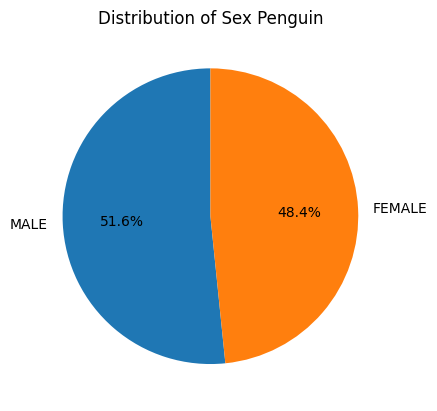

In [ ]:
import matplotlib.pyplot as plt

distribusi_gender = data['sex'].value_counts()
plt.pie(distribusi_gender, labels=distribusi_gender.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Sex Penguin')
plt.show()

In [ ]:
for gender, count in distribusi_gender.items():
    print(f"{gender}: {count}")

MALE: 176
FEMALE: 165


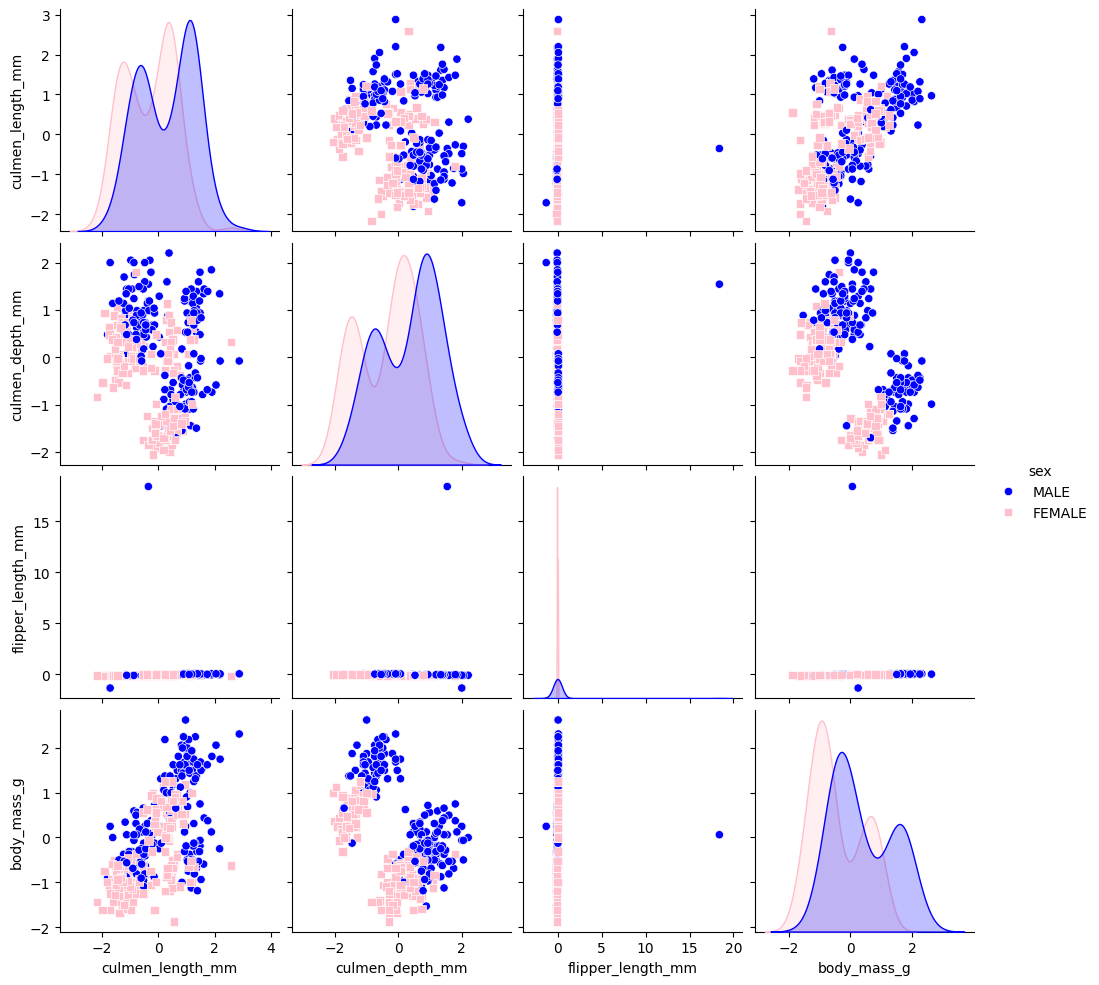

In [ ]:
import seaborn as sns

# Filter hanya kolom-kolom numerik
kolom_numerik = data.select_dtypes(include=['float64', 'int64']).columns

# Buat pairplot dengan hue='sex' untuk memberikan warna berdasarkan jenis kelamin
sns.pairplot(data, vars=kolom_numerik, hue='sex', markers=["o", "s"],
             palette={'MALE': 'blue', 'FEMALE': 'pink'})
plt.show()

# Modeling
1. Split data Training dan data Testing
2. Membuat model klasifikasi dari data yang terpilih

In [ ]:
from sklearn.model_selection import train_test_split

# Data training itu data yang buat di uji (belajar), Data Testing itu data yang buat di ujikan (ujiankan atau di test atau di coba)
# (Kelas Itu Banyak 1 - 27) <------ Jurusan (Ada Macam), X, Y -> X = Numerik , Y = Objek
x = data.drop('sex',axis=1) # ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']
y = data['sex']
# X,Y = Dataframe,Dataset -> 0,1 -> 0 = Baris (Row), 1= Column (Kolom)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=42)
# 0.2 -> kita ngetes 20% data buat di uji, 80% dijadiin pembelajaran (training)
# 0.3 -> kita ngetes 30%
# 0.4
# 0.25
# Sintetis -> data yang sama == 100% tapi klo pakai data beda 20%,10%

print("Jumlah data training:", len(x_train))
print("Jumlah data testing:", len(x_test))

Jumlah data training: 238
Jumlah data testing: 103


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model = RandomForestClassifier(random_state=42)

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

# Evaluasi
1. Membuat classification report untuk nilai akurasi model

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Akurasi Model:", accuracy)
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Akurasi Model: 0.8349514563106796

Confusion Matrix:
[[45  5]
 [12 41]]

Classification Report:
              precision    recall  f1-score   support

      FEMALE       0.79      0.90      0.84        50
        MALE       0.89      0.77      0.83        53

    accuracy                           0.83       103
   macro avg       0.84      0.84      0.83       103
weighted avg       0.84      0.83      0.83       103

